### This is project for detecting most valuable attributes in dataset

Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset_name = 'agaricus-lepiota'
data_path = f'./Data/{dataset_name}.data'
data_properties = f'./Data/{dataset_name}Properties.csv'

In [3]:
df = pd.read_csv(data_path, header=None)
df_properties = pd.read_csv(data_properties)

df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df_properties

,attribute
0,label
1,cap-sh
2,cap-surface
3,cap-color
4,bruises?
5,odor
6,gill-attachment
7,gill-spacing
8,gill-size
9,gill-color


In [5]:
df.columns = df_properties['attribute'].values
df

,label,cap-sh,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
df.drop(columns=['stalk-root'], inplace=True)
df_properties.drop(11, inplace=True)
df_properties

,attribute
0,label
1,cap-sh
2,cap-surface
3,cap-color
4,bruises?
5,odor
6,gill-attachment
7,gill-spacing
8,gill-size
9,gill-color


In [7]:
labels = df['label']
df.drop(columns=['label'], inplace=True)

In [8]:
df.insert(df.columns.shape[0], 'label', labels)
df

,cap-sh,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,label
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [9]:
def look_for_nulls(df, column):
    not_nulls = df[df[column].notna()].shape[0]
    nulls = df[df[column].isna()].shape[0]
    return not_nulls, nulls

def get_unique_values(df, column):
    return df[column].unique()

def get_missing_values(df, column):
    return df[df[column]==' ?'].shape[0]

In [10]:
for column in df.columns:
        not_nulls, nulls = look_for_nulls(df, column)
        uniques = get_unique_values(df, column)
        missing = get_missing_values(df, column)
        print(f'Missing in column {column}: {missing}')
        print(f'Nulls in column {column}: {nulls}')
        print(f'Not nulls in column {column}: {not_nulls}')
        print('_')

Missing in column cap-sh: 0
Nulls in column cap-sh: 0
Not nulls in column cap-sh: 8124
_
Missing in column cap-surface: 0
Nulls in column cap-surface: 0
Not nulls in column cap-surface: 8124
_
Missing in column cap-color: 0
Nulls in column cap-color: 0
Not nulls in column cap-color: 8124
_
Missing in column bruises?: 0
Nulls in column bruises?: 0
Not nulls in column bruises?: 8124
_
Missing in column odor: 0
Nulls in column odor: 0
Not nulls in column odor: 8124
_
Missing in column gill-attachment: 0
Nulls in column gill-attachment: 0
Not nulls in column gill-attachment: 8124
_
Missing in column gill-spacing: 0
Nulls in column gill-spacing: 0
Not nulls in column gill-spacing: 8124
_
Missing in column gill-size: 0
Nulls in column gill-size: 0
Not nulls in column gill-size: 8124
_
Missing in column gill-color: 0
Nulls in column gill-color: 0
Not nulls in column gill-color: 8124
_
Missing in column stalk-shape: 0
Nulls in column stalk-shape: 0
Not nulls in column stalk-shape: 8124
_
Missi

In [11]:
train_idx = np.random.rand(df.shape[0])>0.2
train_idx

array([False, False,  True, ..., False,  True,  True])

In [12]:
df_train = df[train_idx].reset_index(drop=True)
df_val = df[~train_idx].reset_index(drop=True)

df_train

,cap-sh,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,label
0,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
1,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
2,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
3,b,s,w,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,n,m,e
4,b,y,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,s,m,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6446,k,y,n,f,s,f,c,n,b,t,...,p,w,p,w,o,e,w,v,l,p
6447,k,s,e,f,y,f,c,n,b,t,...,p,w,p,w,o,e,w,v,d,p
6448,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
6449,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [13]:
df_train = df_train.to_numpy()
df_val = df_val.to_numpy()


In [14]:
class Node:
    def __init__(self, parent, infSet, deep):
        self.dataset = infSet       # zbiór danych dla danego węzła
        self.parent = parent
        self.deep = deep
        self.lChild = None
        self.rChild = None
        self.condition = None       # warunek w węźle
        self.leaf = False           # oznaczenie czy węzeł jest liściem
        self.leafClass = None       # klasa jaką przechowuje liść

    def set_condition(self, division):  # metoda set służaca do ustalenia atrybutu conddition
        self.condition = division

    def __repr__(self) -> str:
        return f'Node set: {self.dataset}, Condition: {self.condition},  IsLeaf: {self.leaf}, LeafClass: {self.leafClass})'

In [15]:
class DecisionTree:
    def __init__(self, dataset, minExamples = 1):
        self.root = None                # korzeń
        self.classes = []               # lista klas w danych w danym drzewie
        self.deep = 0                   # głębokość drzewa
        self.minExamples = minExamples
        self.madeTree(dataset)          # podczas wywołania konstruktora na podstawie podanego zbioru tworzona jest struktura drzewa

    def madeTree(self, dataset):         # tworzenie drzewa od korzenia
        self.root = Node(None, dataset, 1)
        self.classes = np.unique(dataset[:, -1])
        divisions = self.getDivisions(dataset)
        self.madeTreeRecursive(self.root, divisions)

    def madeTreeRecursive(self, node, availibleDivisions):      # rekurencyjne tworzenie drzewa
        labels, classFreq = np.unique(node.dataset[:,-1], return_counts=True)

        stop = self.checkDatasetStopCriterion(node.dataset, classFreq)

        if not stop:
            bestDivision = self.findBestDivision(availibleDivisions, node.dataset)   # znajdź najlepszy podział
        
            stop = self.checkBestDivisionStopCriterion(node.dataset, bestDivision)
            
        if stop:
            if node.deep > self.deep:
                self.deep = node.deep
            node.leaf = True
            node.leafClass = labels[classFreq.argmax()]
            return

        nextDivisions = availibleDivisions[availibleDivisions!=bestDivision]
        dividedSets = self.divideSet(bestDivision, node.dataset)    # podziel według najlepszego podziału

        node.set_condition(bestDivision)                            # ustal warunek w węźle
        node.lChild = Node(node, dividedSets[0], node.deep + 1)                    # dla podzielonego zbioru według podziały wywołaj funkcję dla prawego i lewego dziecka
        node.rChild = Node(node, dividedSets[1], node.deep + 1)
        self.madeTreeRecursive(node.lChild, nextDivisions)
        self.madeTreeRecursive(node.rChild, nextDivisions)


    def findBestDivision(self, divisions, infSet):      # na podstawie entropii wybierz najlepszy podział dla tego zbioru
        bestDivision = None
        bestRate = -np.inf
        
        for division in divisions:      
            rate = self.infGain(division, infSet)
            if rate > bestRate:
                bestRate = rate
                bestDivision = division

        return bestDivision

    # przyjęta metoda wyboru atrybutu do podziału

    def getMostFreqClass(self, dataset):
        labels, counts = np.unique(dataset[:,-1], return_counts=True)
        
        return  labels[counts.argmax()]

    def checkBestDivisionStopCriterion(self, dataset, bestDivision):
        datasetEntropy = self.calcSetEntropy(dataset)
        bestDivisionEntropy = self.calcDividedSetEntropy(bestDivision, dataset)
        if bestDivisionEntropy > datasetEntropy:
            return True
        return False

        
    def checkDatasetStopCriterion(self, dataset, classFreq):
        if dataset.shape[0] < self.minExamples or classFreq.max()== dataset.shape[0]:
            return True
        return False


    def calcSetEntropy(self, dataset):
        counts = np.unique(dataset[:,-1], return_counts=True)[1]
        class_freq = counts/dataset.shape[0]
        
        return -(class_freq*np.log(class_freq)).sum()

    def calcDividedSetEntropy(self, division, infSet):
        inf = 0
        for dividedSet in self.divideSet(division, infSet):
            inf += (dividedSet.shape[0]/infSet.shape[0]) * self.calcSetEntropy(dividedSet)

        return inf

    def infGain(self, division, infSet):
        return self.calcSetEntropy(infSet) - self.calcDividedSetEntropy(division, infSet)

    # podział podanego zbioru według podanego warunku

    def divideSet(self, division, dataset):
        dividedSets = []

        dividedSets.append(dataset[dataset[:, division[0]] == division[1], :])
        dividedSets.append(dataset[dataset[:, division[0]] != division[1], :])

        return dividedSets


    def getDivisions(self, dataset):
        divisions = []
        for attribute in np.arange(dataset[:,0:-1].shape[1]):
            atr_divisions = self.getDivisionsDiscrete(dataset, attribute)
            divisions.extend(atr_divisions)


        return np.array(divisions)


    # znajdź możliwe podziały w danym secie dla wartości dyskretnych

    def getDivisionsDiscrete(self, dataset, attribute):
        unique_val = np.unique(dataset[:,attribute])
        dt = np.dtype([('attribute', np.int32), ('value', np.unicode_, 16)])
        return np.array([(attribute, val) for val in unique_val], dtype=dt)
        

    # na podstawie zbudowanego drzewa określ do jakiej klasy należy podana w argumencie wywołania próbka

    def predict(self, specimen):
        node = self.root
        while node.leaf is not True:
            if specimen[node.condition[0]] == node.condition[1]:
                node = node.lChild
            else:
                node = node.rChild

        return node.leafClass

In [16]:
np.random.seed(1337)

In [17]:
class DatasetSampling:

    @staticmethod
    def bootstrapSampling(datasetSize, ratio=0):
        allIndices = np.arange(datasetSize)
        numOfUnique = int(ratio*datasetSize)
        uniqueIndices = np.random.choice(allIndices, numOfUnique, replace=False)
        withoutUniqueIndices = np.delete(allIndices, uniqueIndices)
        duplicateIndices = np.random.choice(withoutUniqueIndices, datasetSize-numOfUnique, replace=True)
        
        sampleIndices = np.concatenate((uniqueIndices, duplicateIndices), axis=0)

        return sampleIndices


In [18]:
class RandomForest:
    def __init__(self):
        self.trees = []

    # przy pomocy powyższych metod stwórz losowy zbiór na którego podstawie stworzysz numberOfTrees drzew o parametrach podanych a argumentach wywołania

    def train(self, numberOfTrees, dataset, minExamples, sampleRatio):
        # self.numAttributes = dataset[0,:-1].shape[0]
        for _ in range(numberOfTrees):
            sampleIndices = DatasetSampling.bootstrapSampling(dataset.shape[0], sampleRatio)
            selectedData = dataset[sampleIndices]
            self.trees.append(DecisionTree(selectedData, minExamples))


    def predict(self, inputVector):
        preds = []
        for tree in self.trees:
            preds.append(tree.predict(inputVector))

        labels, counts = np.unique(preds, return_counts=True)
        pred = labels[counts.argmax()]
        
        return pred


In [19]:
forest = RandomForest()
forest.train(100, df_train, 3, sampleRatio=0.62)

In [20]:
results = []
labels = df_val[:,-1]
matches = 0
for row in df_val:
    results.append(forest.predict(row[:-1]))
    if row[-1]==forest.predict(row):
        matches += 1

print('Accuracy:', matches/df_val.shape[0])

Accuracy: 1.0


In [21]:
class AttributeUsage:
    
    def getAttributesUsageInOrder(self, root, attList):
        if root.lChild or root.rChild:
            self.getAttributesUsageInOrder(root.lChild, attList)
            attList[root.condition[0]] += 1
            self.getAttributesUsageInOrder(root.rChild, attList)


    def getTreeAttributesUsage(self, tree, numAttributes):
        attUsage = np.zeros(numAttributes)
        self.getAttributesUsageInOrder(tree.root, attUsage)

        return attUsage

    def getForestAttributesUsage(self, forest, numAttributes):
        attUsage = np.zeros(numAttributes)
        for tree in forest.trees:
            attUsage += self.getTreeAttributesUsage(tree, numAttributes)

        return attUsage

In [22]:
AttUsage = AttributeUsage()

UsageArray = AttUsage.getForestAttributesUsage(forest, df_train[0,:-1].shape[0])

In [23]:
df_results = pd.DataFrame(df_properties['attribute'].loc[df_properties['attribute']!='label'])
df_results['usage'] = UsageArray
df_results



,attribute,usage
1,cap-sh,14.0
2,cap-surface,113.0
3,cap-color,0.0
4,bruises?,183.0
5,odor,300.0
6,gill-attachment,0.0
7,gill-spacing,0.0
8,gill-size,183.0
9,gill-color,0.0
10,stalk-shape,0.0


In [24]:
df_results = df_results.sort_values('usage', ascending=False).head(5)
df_results

,attribute,usage
5,odor,300.0
8,gill-size,183.0
4,bruises?,183.0
2,cap-surface,113.0
20,spore-print-color,100.0


<BarContainer object of 5 artists>

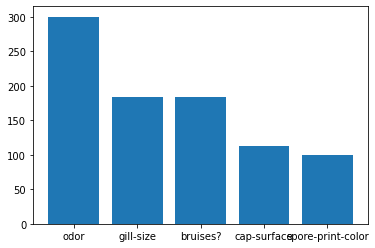

In [25]:
import matplotlib.pyplot as plt

plt.bar(df_results['attribute'], df_results['usage'])

<BarContainer object of 5 artists>

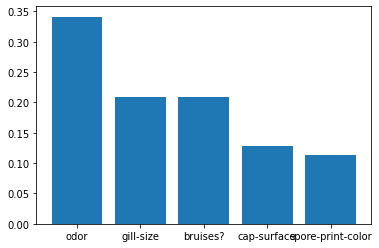

In [26]:
plt.bar(df_results['attribute'], df_results['usage']/df_results['usage'].sum())